# Inicializacion

## Objetivo del trabajo

La Organización Mundial de la Salud (OMS) estima que 17,9 millones de personas mueren cada año por enfermedades cardiovasculares (ECV).

Múltiples factores de riesgo pueden contribuir a las ECV en una persona, como una alimentación poco saludable, la falta de actividad física o enfermedades mentales. Identificar estos factores de riesgo a tiempo podría ayudar a prevenir muchas muertes prematuras.

En esta primera parte del trabajo, realizaremos un analisis exploratorio de los datos para tener un mejor entendimiento de nuestro dataset. Buscaremos realizar 6 visualizaciones interesantes que ayuden a explicar el como se comporta nuestro target 'HeartDisease'.

Basado en la siguiente competición de Kaggle: https://www.kaggle.com/competitions/heart-disease-prediction-dataquest/overview

## Librerias necesarias

In [ ]:
import pandas as pd
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Autenticacion Google Drive y descarga del archivo

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
downloaded = drive.CreateFile({'id':"1J901qWCpTLIYVJxWhb7PNuBtgNOc937I"})
downloaded.GetContentFile('heart_train.csv')

## Lectura CSV y analisis inicial

In [ ]:
heart_data_raw = pd.read_csv('heart_train.csv')

### Primera visualizacion de DataFrame

In [ ]:
heart_data_raw.head(5)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,63,M,ATA,139,217,1,ST,128,Y,1.2,Flat,1
1,55,M,ATA,110,214,1,ST,180,N,0.4,Up,0
2,59,F,ASY,130,338,1,ST,130,Y,1.5,Flat,1
3,47,M,ASY,160,0,0,Normal,124,Y,0.0,Flat,1
4,50,M,ASY,145,0,1,Normal,139,Y,0.7,Flat,1


### Descripcion de las columnas

* Age: edad del paciente [años]

* Sex: sexo del paciente [M: Masculino, F: Femenino]

* ChestPainType: tipo de dolor en el pecho [TA: Angina Típica, ATA: Angina Atípica, NAP: Dolor No Anginoso, ASY: Asintomático]

* RestingBP: presión arterial en reposo [mm Hg]

* Cholesterol: colesterol sérico [mg/dl]

* FastingBS: glucemia en ayunas [1: si FastingBS > 120 mg/dl, 0: en caso contrario]

* RestingECG: resultados del electrocardiograma en reposo [Normal: Normal, ST: anomalía de la onda ST-T (inversiones de la onda T y/o elevación o depresión del ST > 0.05 mV), LVH: posible o definitiva hipertrofia ventricular izquierda según los criterios de Estes]

* MaxHR: frecuencia cardíaca máxima alcanzada [valor numérico entre 60 y 202]

* ExerciseAngina: angina inducida por ejercicio [Y: Sí, N: No]

* Oldpeak: oldpeak = ST [valor numérico medido como depresión del segmento ST]

* ST_Slope: pendiente del segmento ST durante el ejercicio máximo [Up: ascendente, Flat: plana, Down: descendente]

* HeartDisease: clase de salida [1: enfermedad cardíaca, 0: Normal]

### Estructura del Dataframe

Primero queremos ver informacion sobre las columnas de nuestro Dataset.

In [ ]:
heart_data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 734 entries, 0 to 733
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             734 non-null    int64  
 1   Sex             734 non-null    object 
 2   ChestPainType   734 non-null    object 
 3   RestingBP       734 non-null    int64  
 4   Cholesterol     734 non-null    int64  
 5   FastingBS       734 non-null    int64  
 6   RestingECG      734 non-null    object 
 7   MaxHR           734 non-null    int64  
 8   ExerciseAngina  734 non-null    object 
 9   Oldpeak         734 non-null    float64
 10  ST_Slope        734 non-null    object 
 11  HeartDisease    734 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 68.9+ KB


Notamos que todas las columnas tiene la misma cantidad de valores no nulos. Esto es bueno ya que no tenemos valores faltantes.

Ademas, vemos que es un dataset chico (734 observaciones) por lo que hacer optimizaciones para reducir su tamaño es innecesario.

In [ ]:
len(heart_data_raw)

734

Confirmamos entonces que ninguna columna tiene datos faltantes.

# Proporcion de pacientes con enfermedad cardiaca

Para empezar con el analisis, primero queremos tener una idea de cuantos pacientes con enfermedad cardiaca tenemos en todas las observaciones.

In [ ]:
totals = len(heart_data_raw)
cardiacs = heart_data_raw['HeartDisease'].sum()

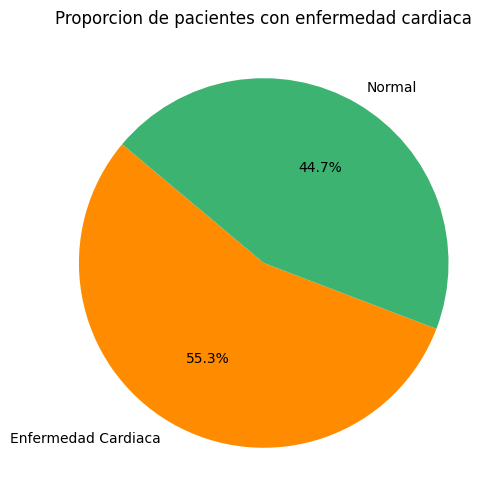

In [ ]:
values = [cardiacs, totals-cardiacs]

plt.figure(figsize=(6,6))
plt.title("Proporcion de pacientes con enfermedad cardiaca")

plt.pie(values, labels=['Enfermedad Cardiaca', 'Normal'], autopct='%1.1f%%', startangle=140, colors=["darkorange", "mediumseagreen"])
plt.show()

Vemos que en nuestras observaciones tenemos una cantidad equilibrada de pacientes segun si tienen una enfermedad cardiaca.

Esto nos ayuda a que nuestro analisis sea mas efectivo.

# Analisis del impacto del Colesterol en enfermedades cardiacas

En esta seccion queremos analizar como impacta el nivel de colesterol [mg/dl] en las enfermedades cardiacas.

Para eso, analizaremos como se distribuyen los niveles de colesterol segun si los pacientes tienen enfermedades cardiacas o no.

In [ ]:
heart_data_raw.groupby('HeartDisease')['Cholesterol'].describe()

,count,mean,std,min,25%,50%,75%,max
HeartDisease,,,,,,,,
0,328.0,232.323171,73.381741,0.0,201.0,230.0,270.25,564.0
1,406.0,179.721675,125.222149,0.0,0.0,219.0,268.75,603.0


Vemos que hay algunas observaciones con nivel 0 de colesterol. Entendemos que estos son datos faltantes, por lo que los filtramos.

In [ ]:
cholesterol_analysis = heart_data_raw[heart_data_raw["Cholesterol"] > 0]
len(cholesterol_analysis)

605

Se eliminaron alrededor de 100 observaciones con un nivel de colesterol igual a 0 mg/dl.

<ipython-input-13-817a2a1c3e17>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cholesterol_analysis["HeartDisease"], y=cholesterol_analysis['Cholesterol'], palette=['mediumseagreen', 'darkorange'])


([<matplotlib.axis.XTick at 0x7b37f3677dd0>,
 [Text(0, 0, 'No'), Text(1, 0, 'Si')])

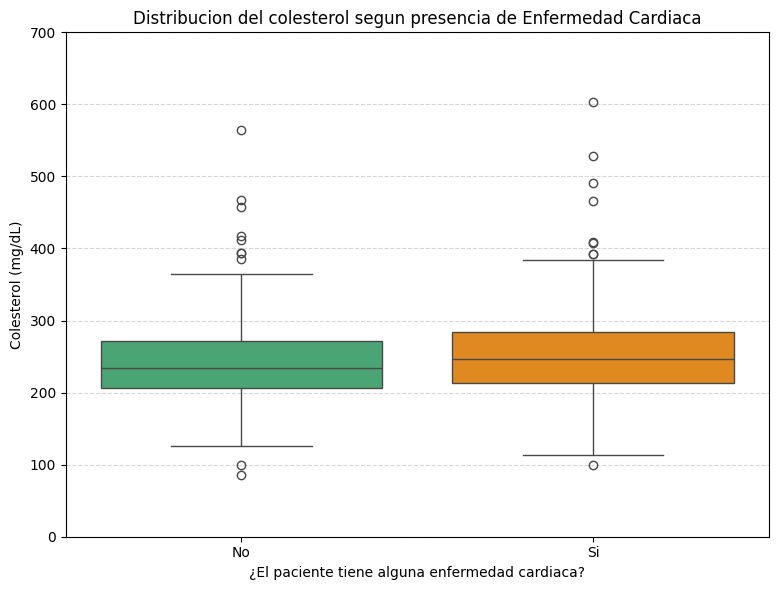

In [ ]:
plt.figure(figsize=(8,6))
plt.title("Distribucion del colesterol segun presencia de Enfermedad Cardiaca")
plt.xlabel('¿El paciente tiene alguna enfermedad cardiaca?')
plt.ylabel('Colesterol (mg/dL)')
plt.ylim((0, 700))
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()

sns.boxplot(x=cholesterol_analysis["HeartDisease"], y=cholesterol_analysis['Cholesterol'], palette=['mediumseagreen', 'darkorange'])
plt.xticks([0, 1], ['No', 'Si'])

Vemos que la mediana de los niveles de colesterol son:
* Aproximadamente 230 mg/dl para los pacientes normales
* Aproximadamente 250 mg/dl para los pacientes con enfermedad cardiaca.

Tambien notamos que tanto para pacientes normales como cardiacos, existen valores extremos en los niveles de colesterol, por lo que no es raro ver pacientes no enfermos con niveles altos de colesterol.

Podemos concluir que con los datos obtenidos no podemos decir que el colesterol tenga un impacto significativo en las enfermedades cardiacas.

# Analisis del impacto del Electrocardiograma en Reposo en Enfermedades cardiacas

Queremos analizar cuantos pacientes tienen alguna enfermedad cardiaca segun como les dio el resultado de su Electrocardiograma en Reposo.

De esta manera, veremos que tanta certeza nos da cada uno de los resultados de que tenemos o no una enfermedad cardiaca.

Recordamos, los posibles resultados del Electrocardigrama en reposo son:
* Normal
* ST: anomalía de la onda ST-T (inversiones de la onda T y/o elevación o depresión del ST > 0.05 mV)
* LVH: posible o definitiva hipertrofia ventricular izquierda según los criterios de Estes

In [ ]:
ecg_info = heart_data_raw.groupby('RestingECG')['HeartDisease'].agg(['count', 'mean']).reset_index()
ecg_info.head(3)

,RestingECG,count,mean
0,LVH,146,0.575342
1,Normal,447,0.512304
2,ST,141,0.659574


In [ ]:
lvh_ecg_prop = ecg_info.loc[0]['mean']
normal_ecg_prop = ecg_info.loc[1]['mean']
st_ecg_prop = ecg_info.loc[2]['mean']

st_ecg_prop

np.float64(0.6595744680851063)

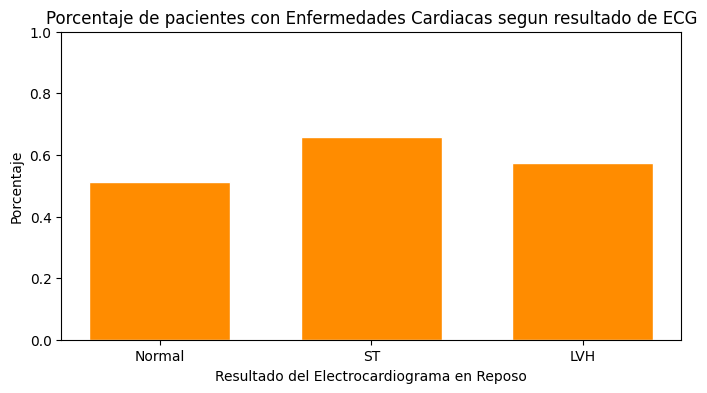

In [ ]:
plt.figure(figsize=(8,4))

# Heights of bars
bars = [normal_ecg_prop, st_ecg_prop, lvh_ecg_prop]


# The position of the bars on the x-axis
r = [0, 1.5, 3]

# Names of group and bar width
names = ['Normal','ST', 'LVH']

plt.title("Porcentaje de pacientes con Enfermedades Cardiacas segun resultado de ECG")

plt.bar(r, bars, color='darkorange', edgecolor='white', width=1)

plt.xticks(r, names)
plt.ylabel("Porcentaje")
plt.xlabel("Resultado del Electrocardiograma en Reposo")
plt.ylim((0, 1))

plt.show()

A partir de la visualizacion notamos varias cosas:
* Un resultado normal del ECG no implica que el paciente no este enfermo. Aproximadamente el 50% de los pacientes cuyo ECG dio un resultado normal tenian alguna enfermedad cardiaca.
* Un resultado distinto al normal aumenta las chances de que el paciente tenga alguna enfermedad cardiaca.
* Aproximadamente un 65% de los pacientes con una anomalía de la onda ST-T (Resultado ST) tienen alguna enfermedad cardiaca.
* Un resultado distinto al normal por si solo no indica que el paciente tenga alguna enfermedad cardiaca.

# Analisis detallado de un ECG con resultado ST y las variables Oldpeak, ST_Slope, y su impacto en la variable HeartDisease

En este analisis buscaremos analizar relaciones entre variables que parecen tener mucho que ver. Estas son:
* RestingECG: Resultado del Electrocardiograma en Reposo realizado al paciente. Un resultado ST indica una anomalía de la onda ST-T.
* Oldpeak: valor numérico medido como depresión del segmento ST.
* ST_Slope: pendiente del segmento ST durante el ejercicio máximo [Up: ascendente, Flat: plana, Down: descendente]

El objetivo es encontrar como impactan estas variables en la variable objetivo 'HeartDisease'.


## Distribucion de Oldpeak segun resultado del ECG y presencia de enfermedad

Primero analizaremos como se comporta la variable 'Oldpeak' segun que resultado tuvo el paciente en su Electrocardiograma en Reposo y si el paciente tiene o no una enfermedad cardiaca.

Antes, analizamos que valores puede tomar la variable analizada.

In [ ]:
heart_data_raw.groupby('HeartDisease')['Oldpeak'].describe()

,count,mean,std,min,25%,50%,75%,max
HeartDisease,,,,,,,,
0,328.0,0.422561,0.733666,-1.1,0.0,0.0,0.725,4.2
1,406.0,1.222660,1.140426,-2.6,0.0,1.2,2.000,5.6


A priori vemos que los pacientes con enfermedad cardiaca tienen un valor en 'Oldpeak' mas alta que los pacientes sanos.

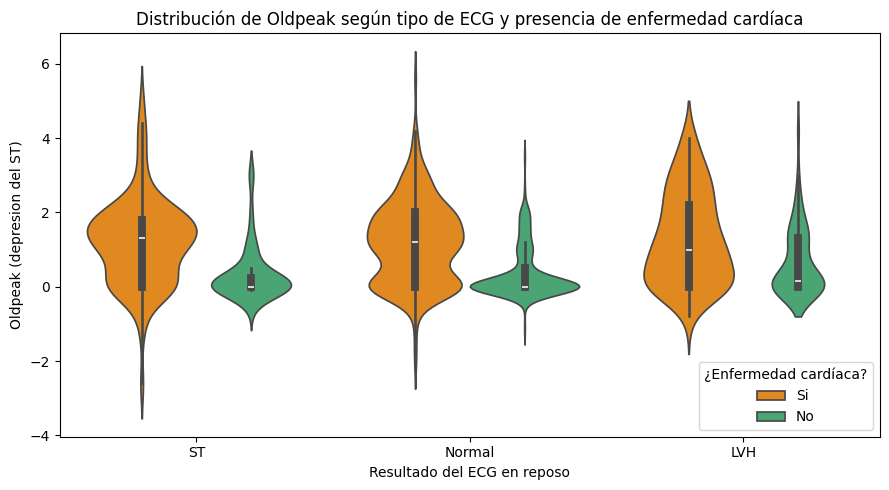

In [ ]:
heart_data_raw["HeartDisease_str"] = heart_data_raw["HeartDisease"].map({0: "No", 1: "Si"})

plt.figure(figsize=(9,5))
sns.violinplot(data=heart_data_raw, x="RestingECG", y="Oldpeak", hue="HeartDisease_str", palette={"No": 'mediumseagreen', "Si": 'darkorange'})
plt.title("Distribución de Oldpeak según tipo de ECG y presencia de enfermedad cardíaca")
plt.ylabel("Oldpeak (depresion del ST)")
plt.xlabel("Resultado del ECG en reposo")
plt.legend(title="¿Enfermedad cardíaca?")
plt.tight_layout()
plt.show()

A partir de la visualizacion observamos algunas cosas interesantes:
* Los pacientes sanos suelen tener un 'Oldpeak' cercano al 0, mientras que los pacientes enfermos suelen tener valores mas altos.
* Los pacientes enfermos con anomalias ST tienen una distribucion de 'Oldpeak' desplazada hacia valores altos. Esto sugiere que cuando hay anomalías ST y valores altos de Oldpeak, hay más probabilidad de enfermedad cardíaca.
* Los pacientes enfermos con resultado LVH muestran un patron similar a los pacientes con anomalias ST.

## Proporcion de enfermedad cardiaca segun pendiente ST y resultado del ECG

Queremos analizar que tipos de pendientes ST aparecen con mas frecuencia en pacientes cuyo resultado de su ECG mostro anomalías de la onda ST-T, y como estas pendientes se relacionan con una enfermedad cardiaca.

In [ ]:
st_patients = heart_data_raw[heart_data_raw['RestingECG'] == 'ST']
slope_analysis = st_patients.groupby('ST_Slope')['HeartDisease'].agg(['count', 'mean']).reset_index()
slope_analysis

,ST_Slope,count,mean
0,Down,9,1.000000
1,Flat,80,0.900000
2,Up,52,0.230769


In [ ]:
down_slope_prop = slope_analysis.loc[0]['mean']
flat_slope_prop = slope_analysis.loc[1]['mean']
up_slope_prop = slope_analysis.loc[2]['mean']

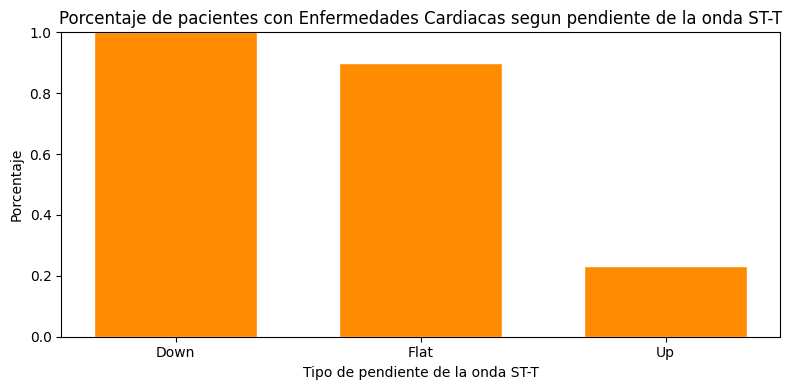

In [ ]:
plt.figure(figsize=(8,4))

# Heights of bars
bars = [down_slope_prop, flat_slope_prop, up_slope_prop]


# The position of the bars on the x-axis
r = [0, 1.5, 3]

# Names of group and bar width
names = ['Down','Flat', 'Up']

plt.title("Porcentaje de pacientes con Enfermedades Cardiacas segun pendiente de la onda ST-T")

plt.bar(r, bars, color='darkorange', edgecolor='white', width=1)

plt.xticks(r, names)
plt.ylabel("Porcentaje")
plt.xlabel("Tipo de pendiente de la onda ST-T")
plt.ylim((0, 1))
plt.tight_layout()

plt.show()

A partir de la visualizacion, observamos lo siguiente:
* El 100% de los pacientes cuyo ECG dio un resultado ST y tienen una pendiente Descendente de la onda ST-T, tienen una enfermedad cardiaca. Parece ser una afirmacion contundente, pero no hay que olvidar que solo observamos 9 pacientes con estas caracteristicas.
* Casi el 90% de los pacientes cuyo ECG dio un resultado ST y tienen una pendiente Plana de la onda ST-T tienen una enfermedad cardiaca. Esto es mas valioso ya que observamos 80 pacientes con estas caracteristicas.
* Por ultimo, el porcentaje de pacientes con enfermedad cardiaca baja muchisimo cuando tiene una pendiente Ascendente en la onda ST-T. Observamos 52 pacientes con estas caracteristicas.

# Analisis de la variable 'ChestPainType' y su impacto en las enfermedades cardiacas

ChestPainType representa el tipo de dolor en el pecho que presento el paciente.Los posibles tipos son:
* TA: Angina Típica
* ATA: Angina Atípica
* NAP: Dolor No Anginoso
* ASY: Asintomático

Consideramos que es una variable importante y que vale la pena analizar su implicancia en las enfermedades cardiacas.

## Porcentaje de pacientes con Enfermedad Cardiaca segun ChestPainType

Primero queremos saber cuantos pacientes presentan cada tipo de dolor en el pecho.

In [ ]:
heart_data_raw['ChestPainType'].value_counts()

,count
ChestPainType,
ASY,403
NAP,155
ATA,136
TA,40


Vemos que el tipo de dolor de pecho mas comun es el Asintomatico.

Ahora, queremos ver que porcentaje de pacientes presentan alguna enfermedad cardiaca segun cada tipo de dolor en el pecho.

In [ ]:
chestpain_data = heart_data_raw.groupby('ChestPainType')['HeartDisease'].mean().reset_index()
chestpain_data

,ChestPainType,HeartDisease
0,ASY,0.786600
1,ATA,0.139706
2,NAP,0.335484
3,TA,0.450000


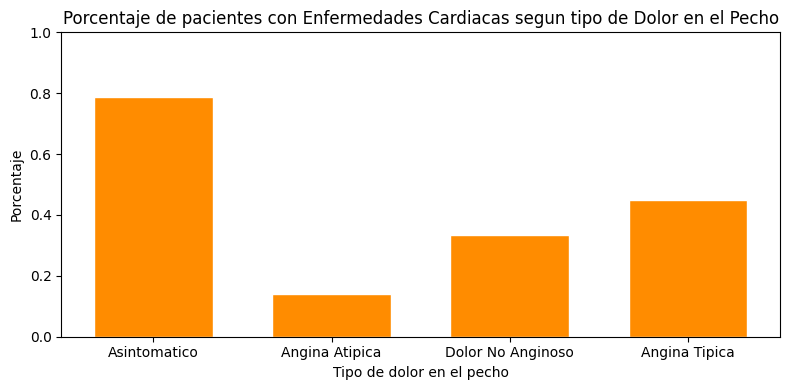

In [ ]:
plt.figure(figsize=(8,4))

# Heights of bars
bars = [chestpain_data.loc[0]['HeartDisease'], chestpain_data.loc[1]['HeartDisease'], chestpain_data.loc[2]['HeartDisease'], chestpain_data.loc[3]['HeartDisease']]

# The position of the bars on the x-axis
r = [0, 1.5, 3, 4.5]

# Names of group and bar width
names = ['Asintomatico','Angina Atipica', 'Dolor No Anginoso', 'Angina Tipica']

plt.title("Porcentaje de pacientes con Enfermedades Cardiacas segun tipo de Dolor en el Pecho")

plt.bar(r, bars, color='darkorange', edgecolor='white', width=1)

plt.xticks(r, names)
plt.ylabel("Porcentaje")
plt.xlabel("Tipo de dolor en el pecho")
plt.ylim((0, 1))
plt.tight_layout()

plt.show()

Observamos que:
* El tipo de dolor Asintomatico, ademas de ser el mas presente entre todos los pacientes, es el que mas porcentaje de pacientes con enfermedades cardiacas tiene asociado, casi un 80%.
* De los 155 pacientes con un dolor tipo Angina Atipica, menos del 20% tienen alguna enfermedad cardiaca.
* Un 45% de los pacientes con un dolor tipo Angina Tipica tienen alguna enfermedad cardiaca.

# Analisis del impacto de la frecuencia cardiaca (MaxHR) y la presion arterial (RestingBP) en 'HeartDisease'

Queremos analizar las diferencias que presentan los pacientes enfermos y los sanos en terminos de maxima frecuencia cardiaa y presion arterial.
De esta forma, veremos si estas variables impactan o no en si un paciente presenta enfermedades cardiacas.

<ipython-input-25-80b5e32df653>:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(['No', 'Sí'])
<ipython-input-25-80b5e32df653>:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(['No', 'Sí'])


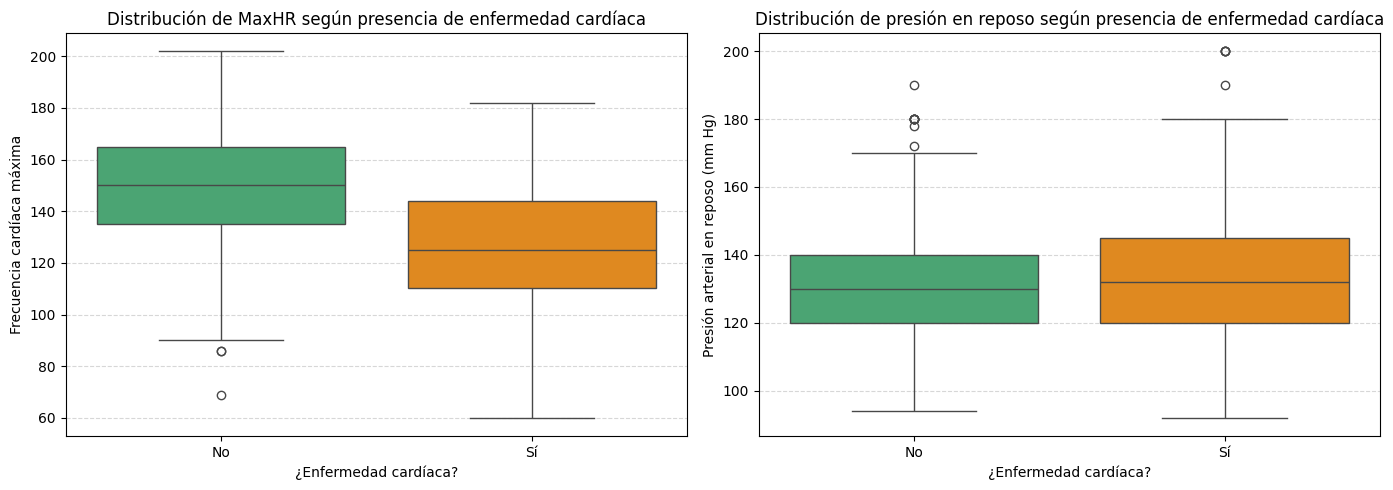

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# MaxHR
sns.boxplot(
    data=heart_data_raw,
    x="HeartDisease",
    y="MaxHR",
    hue="HeartDisease",
    palette=['mediumseagreen', 'darkorange'],
    legend=False,
    ax=axes[0]
)
axes[0].set_title("Distribución de MaxHR según presencia de enfermedad cardíaca")
axes[0].set_xlabel("¿Enfermedad cardíaca?")
axes[0].set_ylabel("Frecuencia cardíaca máxima")
axes[0].set_xticklabels(['No', 'Sí'])
axes[0].grid(True, axis='y', linestyle='--', alpha=0.5)

# RestingBP
sns.boxplot(
    data=heart_data_raw,
    x="HeartDisease",
    y="RestingBP",
    hue="HeartDisease",
    palette=['mediumseagreen', 'darkorange'],
    legend=False,
    ax=axes[1]
)
axes[1].set_title("Distribución de presión en reposo según presencia de enfermedad cardíaca")
axes[1].set_xlabel("¿Enfermedad cardíaca?")
axes[1].set_ylabel("Presión arterial en reposo (mm Hg)")
axes[1].set_xticklabels(['No', 'Sí'])
axes[1].grid(True, axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

Vemos una clara diferencia en la frecuencia cardiaca maxima segun la presencia de enfermedad cardiaca:
* Los pacientes sanos tienen una mediana de alrededor de 150 pulsaciones
* Los pacientes con alguna enfermedad cardiaca tienen una mediana de alrededor de 125 pulsaciones, bastante menor.

Podemos decir entonces que los pacientes sanos suelen tener una frecuencia mayor de pulsaciones maxima durante las pruebas de ejercicio.

En la presion arterial no se ven diferencias muy claras. Los pacientes con alguna enfermedad cardiaca parecen tener una presion sanguinea ligeramente mas alta que los pacientes sanos.

# Analisis de la Edad y Genero en el las Enfermedades Cardiacas

Por ultimo, queremos analizar si la Edad y el Genero tienen alguna incidencia en las enfermedades cardiacas.

Para eso, clasificaremos a los pacientes observados en distintas categorias segun su edad.

## Clasificando los pacientes segun la edad

In [ ]:
heart_data_raw['Age'].describe()

,Age
count,734.000000
mean,53.848774
std,9.440574
min,29.000000
25%,47.000000
50%,55.000000
75%,61.000000
max,77.000000


Vemos que tenemos una edad minima de 29 años y una edad maxima de 77 años.

Clasificaremos a los pacientes en estas categorias:
* 30's: Pacientes entre 29 y 39 años
* 40's: Pacientes entre 40 y 49 años
* 50's: Pacientes entre 50 y 59 años
* 60's: Pacientes entre 60 y 69 años
* 70's: Pacientes entre 70 y 79 años

In [ ]:
def age_group(age):
  if age <= 39:
    return "30's"
  elif age >= 40 and age < 50:
    return "40's"
  elif age >= 50 and age < 60:
    return "50's"
  elif age >= 60 and age < 70:
    return "60's"
  else:
    return "70's"

In [ ]:
heart_data_raw['Age_Group'] = heart_data_raw['Age'].map(age_group)
heart_data_raw.head(3)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,HeartDisease_str,Age_Group
0,63,M,ATA,139,217,1,ST,128,Y,1.2,Flat,1,Si,60's
1,55,M,ATA,110,214,1,ST,180,N,0.4,Up,0,No,50's
2,59,F,ASY,130,338,1,ST,130,Y,1.5,Flat,1,Si,50's


In [ ]:
heart_data_raw.groupby(['Age_Group', 'Sex']).size()

Age_Group  Sex
30's       F       11
           M       51
40's       F       42
           M      119
50's       F       56
           M      240
60's       F       41
           M      147
70's       F        5
           M       22
dtype: int64

Vemos que generalmente nuestro dataset tiene mas pacientes hombres que mujeres, y que las edades mas comunes son entre 40 y 60 años.

## Analisis de la incidencia de la edad y genero en las enfermedades cardiacas

Primero calculamos el porcentaje de pacientes con alguna enfermedad cardiaca segun cada combinacion de grupo etario/genero.

In [ ]:
age_sex_analysis = heart_data_raw.groupby(['Age_Group', 'Sex'])['HeartDisease'].mean().unstack()

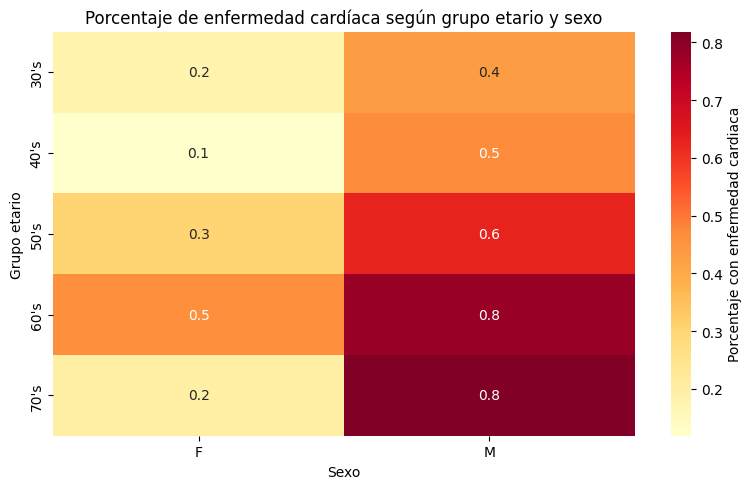

In [ ]:
plt.figure(figsize=(8, 5))
sns.heatmap(
    age_sex_analysis,
    annot=True,
    fmt=".1f",
    cmap="YlOrRd",
    cbar_kws={'label': 'Porcentaje con enfermedad cardiaca'}
)
plt.title("Porcentaje de enfermedad cardíaca según grupo etario y sexo")
plt.xlabel("Sexo")
plt.ylabel("Grupo etario")
plt.tight_layout()
plt.show()

Vemos algunas cosas interesantes:
* El porcentaje de mujeres con alguna enfermedad cardiaca es significativamente menor para cualquier grupo etario que para los hombres.
* El porcentaje de mujeres con alguna enfermedad cardiaca no aumenta junto con la edad.
* El porcentaje de hombres con alguna enfermedad cardiaca aumenta junto con la edad.
* 80% de los mas de 160 pacientes hombres mayores a 60 años tenian alguna enfermedad cardíaca.